<a href="https://colab.research.google.com/github/TheAnubisGod/Robotics/blob/main/Motor_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №2 (Моделирование работы двигателя постоянного тока)

<h1>Выполнил: студент группы R3137 Дюжев Владислав Дмитриевич</h1>

## Создание математической модели

В отличие от предыдущей лабораторной, мы будем учитывать влияние ЭДС самоиндукции на процессы проходящие в двигателе. <br>
<center>Общий момент двигателя:</center>
$$\dot\omega J={M_\Sigma}=M_{el}+M_{oth}=M_{el}. \tag{1}$$
<center>Закон Ома с учетом ЭДС самоиндукции:</center>
$$\varepsilon_c + \varepsilon_i + U = IR. \tag{2}$$
<center>Примем $k_m = 2Blr_x$ постоянным для данного напряжения $U_{ctrl}$:</center>
$$M_{el} = {k_m}I. \tag{3}$$
<center>Примем $k_e = 2Blr_x$ постоянным для данного напряжения $U_{ctrl}$:</center>
$$\varepsilon_{i}=-\frac{d\Phi}{dt}=-{k_e}\omega. \tag{4}$$
<center>ЭДС самоиндукции:</center>
$$\varepsilon_{с}=-L\frac{dI}{dt}.\tag{5}$$
<center>Подставив, запишем апериодическое звено второго порядка:</center>
$$\frac{L}{R}\ddot\omega + \dot\omega+\frac{k_m k_e}{JR}\omega=\frac{k_m}{JR}U. \tag{6}$$
$$T_{m}T_{я}\ddot\omega + T_{m}\dot\omega+\omega=\frac{U}{k_e}. \tag{7}$$
$$\begin{cases} \dot\omega = \frac{k_mI}{J} \\ \dot{I} = \frac{U_{ctrl}}{L} - \frac{k_e}{L}\omega - \frac{RI}{L} \end{cases}. \tag{8}$$


In [2]:
import sympy
U, t = sympy.symbols("U, t") # Инициализируем обозначения
k_e, k_m, L, J, R = sympy.symbols("k_e, k_m, L, J, R", positive=True) 
omega = sympy.Function("omega")

Запишем дифференциальное уравнение:

In [3]:
diff_eq = sympy.Eq(L*(omega(t).diff(t)).diff(t)/R + omega(t).diff(t) + (k_m*k_e/(J*R))*omega(t), k_m*U/(J*R))
diff_eq

Eq(L*Derivative(omega(t), (t, 2))/R + Derivative(omega(t), t) + k_e*k_m*omega(t)/(J*R), U*k_m/(J*R))

Решим его, используя начальные условия:

In [4]:
diff_eq_sol = sympy.dsolve(diff_eq, omega(t), ics={omega(0):0,omega(t).diff(t,1).subs(t,0):0}) # Решим уравнение
omega_f = diff_eq_sol.rhs
omega_f

U/k_e + (-sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R + sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L)) + (sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R - sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))

Функция угла от времени:

In [5]:
theta = sympy.integrate(omega_f, (t,0,t))
theta

U*t/k_e + Piecewise((-2*sqrt(J)*L*(sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R - sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))/(sqrt(J)*R + sqrt(J*R**2 - 4*L*k_e*k_m)) + 2*sqrt(J)*L*(sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))/(sqrt(J)*R + sqrt(J*R**2 - 4*L*k_e*k_m)) - 2*sqrt(J)*L*(-sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R + sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))/(sqrt(J)*R - sqrt(J*R**2 - 4*L*k_e*k_m)) + 2*sqrt(J)*L*(-sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))/(sqrt(J)*R - sqrt(J*R**2 - 4*L*k_e*k_m)), Ne(sqrt(J)*R + sqrt(J*R**2 - 4*L*k_e*k_m), 0) & Ne(sqrt(J)*R - sqrt(J*R**2 - 4*L*k_e*k_m), 0)), (-2*sqrt(J)*L*(sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R - sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))/(sqrt(J)*R + sqrt(J*R**2 - 4*L*k_e*k_m)) + 2*sqrt(J)*L*(sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))/(sqrt(J)*R + sqrt(J*R**2 - 4*L*k_e*k_m)) + t*(-sqrt(J)*R*U/(2

Функция тока от времени:

In [6]:
I = sympy.diff(omega_f*J/k_m,t)
I

J*((-R - sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))*(sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R - sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))/(2*L) + (-R + sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))*(-sqrt(J)*R*U/(2*k_e*sqrt(J*R**2 - 4*L*k_e*k_m)) - U/(2*k_e))*exp(t*(-R + sqrt(J*R**2 - 4*L*k_e*k_m)/sqrt(J))/(2*L))/(2*L))/k_m

## Анализ данных (получение конструктивных постоянных)
Получив выражения для основных функций, займемся анализом экспериментальных данных, для нахождения конструктивных постоянных. <br>
Момент инерции двигателя мы можеи расчитать по формуле: $J = i^2\frac{mr^2}{2} = 0.0024 [кг*м^2]$ <br>
На практике мы измеряли $L=0.0048[Гн]$.

In [7]:
import pandas as pd 
import numpy as np

In [8]:
J_real = 0.0024
L_real = 0.0048

На практике мы замеряли силу тока в застопоренном двигателе (для исключения влияния ЭДС индукции) при 20 различных значениях входного напряжениях:

In [9]:
U_vals = np.array([-7.53,-6.67,-5.92,-5.16,-4.4,-3.65,-2.89,-2.13,-1.38,-0.63,0.63,1.38,2.13,2.89,3.64,4.4,5.15,5.9,6.66,7.52])
I_vals = np.array([-0.78, -0.74, -0.72, -0.69, -0.62, -0.53, -0.42, -0.31, -0.23, -0.11, 0.11, 0.23, 0.31, 0.42, 0.54, 0.63, 0.69, 0.72, 0.73, 0.74])

Построим график зависимости $U(I)$:

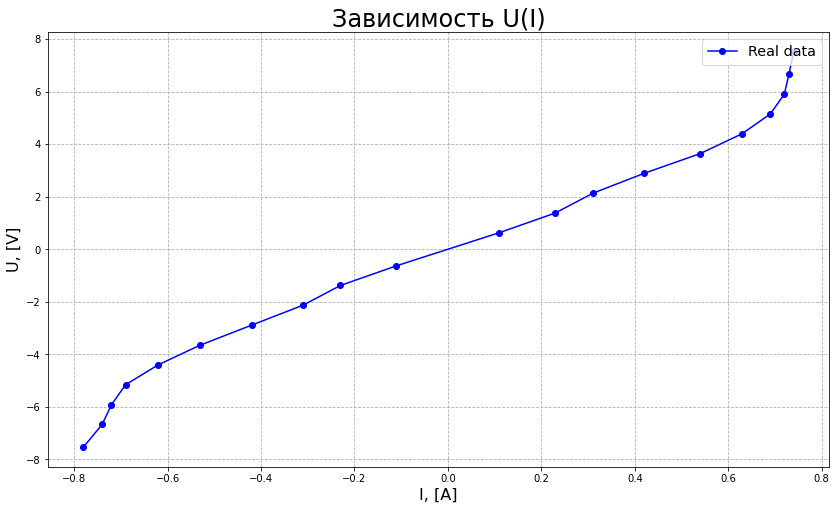

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1)
f.set_size_inches((14, 8))
ax.plot(I_vals, U_vals, "b", markersize=6, marker="o", linestyle="-", label="Real data")
ax.set_xlabel("I, [A]", size=16)
ax.set_ylabel("U, [V]", size=16)
ax.set_title("Зависимость U(I)", size=24)
ax.grid(True, linestyle="--")
legend = ax.legend(loc='upper right', fontsize='x-large')
legend.get_frame().set_facecolor('#FFFFFF')
f.show()

Так как мотор застопорен и мы фиксируем установившееся значение тока, воспользуемся линейным законом $U=IR$ для нахождения параметра R:

In [11]:
# Метод наименьших квадратов для функции вида y = k*x
R_app = np.sum(U_vals*I_vals) / np.sum(I_vals*I_vals)
R_app

8.119501782773453

Найдем $k_e = k_m$. Найдем значения $\omega_{wnls}$ для каждого значения $U_{ctrl}$ путем аппроксимации функции угла от времени с помощью упрощенной модели. Воспользуемся кодом из первой лабораторной:

In [12]:
from google.colab import files 
uploaded = files.upload()  

Saving data(10).txt to data(10).txt
Saving data(-10).txt to data(-10).txt
Saving data(20).txt to data(20).txt
Saving data(-20).txt to data(-20).txt
Saving data(30).txt to data(30).txt
Saving data(-30).txt to data(-30).txt
Saving data(40).txt to data(40).txt
Saving data(-40).txt to data(-40).txt
Saving data(50).txt to data(50).txt
Saving data(-50).txt to data(-50).txt
Saving data(60).txt to data(60).txt
Saving data(-60).txt to data(-60).txt
Saving data(70).txt to data(70).txt
Saving data(-70).txt to data(-70).txt
Saving data(80).txt to data(80).txt
Saving data(-80).txt to data(-80).txt
Saving data(90).txt to data(90).txt
Saving data(-90).txt to data(-90).txt
Saving data(100).txt to data(100).txt
Saving data(-100).txt to data(-100).txt


In [13]:
time_all = []
angle_all = []
speed_all = []
for i in range(-100, 110, 10):
    if i == 0:
        continue
    data = (pd.read_csv(f"data({i}).txt", header=None, sep=" ")).to_numpy()
    time_all.append(data[:, 0])
    angle_all.append(data[:, 1] * np.pi / 180)
    speed_all.append(data[:, 2]/(180/np.pi))

In [14]:
def angle(time, T_m, w_nls):
  return w_nls*time + w_nls*T_m*np.exp(-time/T_m) - w_nls*T_m

def speed(time, T_m, w_nls):
  return w_nls*(1 - np.exp(-time/T_m))

In [15]:
import scipy.optimize as opt
Tm_app = []
Wm_app = []
for j in range(20):
    time_data = time_all[j]
    angle_data = angle_all[j]
    speed_data = speed_all[j]
    p0 = [0.05,7]  
    # Аппроксимация данных об угле
    w, _ = opt.curve_fit(angle, time_data, angle_data, p0=p0) 
    Tm_app.append(w[0])
    Wm_app.append(w[1])

In [16]:
Wm_app = np.array(Wm_app)
Wm_app

array([-15.40369449, -13.63828472, -12.0690301 , -10.49330642,
        -8.91945818,  -7.33426623,  -5.77232406,  -4.19684857,
        -2.64610642,  -1.09697792,   1.07423318,   2.62971554,
         4.22775495,   5.81272883,   7.42424129,   9.03803161,
        10.64773783,  12.24266161,  13.81245635,  15.65856915])

Аппроксимируем формулу $\varepsilon = \omega k_e$. При устоявшейся скорости ЭДС индукции равна Подаваемому напряжению: $U_{ctrl} = \omega_{nls} k_e$.

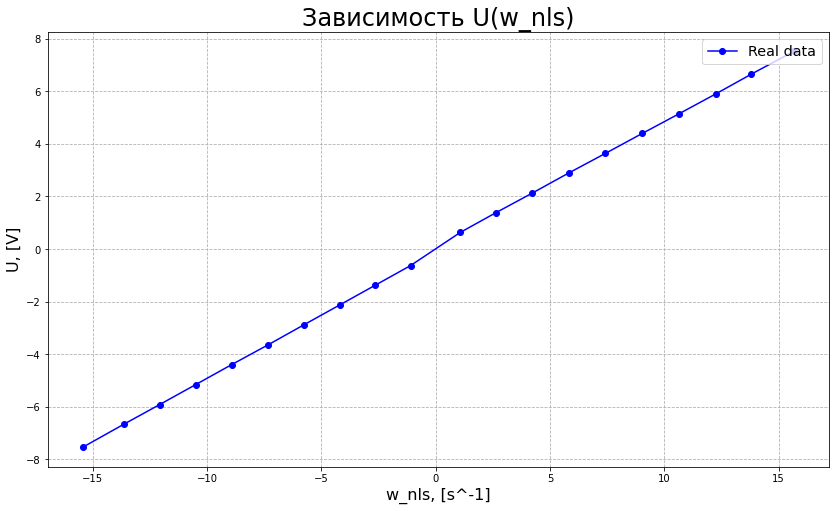

In [17]:
f, ax = plt.subplots(1, 1)
f.set_size_inches((14, 8))
ax.plot(Wm_app, U_vals, "b", markersize=6, marker="o", linestyle="-", label="Real data")
ax.set_xlabel("w_nls, [s^-1]", size=16)
ax.set_ylabel("U, [V]", size=16)
ax.set_title("Зависимость U(w_nls)", size=24)
ax.grid(True, linestyle="--")
legend = ax.legend(loc='upper right', fontsize='x-large')
legend.get_frame().set_facecolor('#FFFFFF')
f.show()

In [18]:
k_e_app = np.sum(U_vals*Wm_app) / np.sum(Wm_app*Wm_app)
k_m_app = k_e_app
k_e_app

0.48788658414097674

Определив все конструктивные постоянные, построим графики скорости основываясь на новой модели:

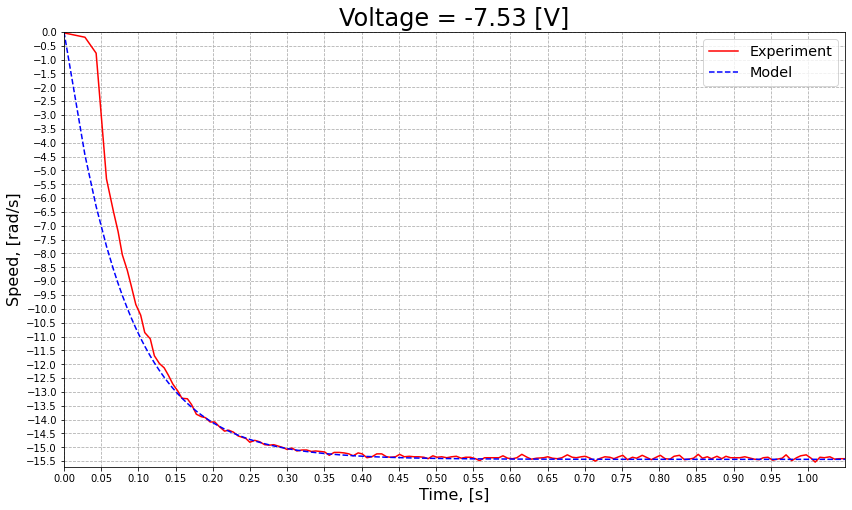

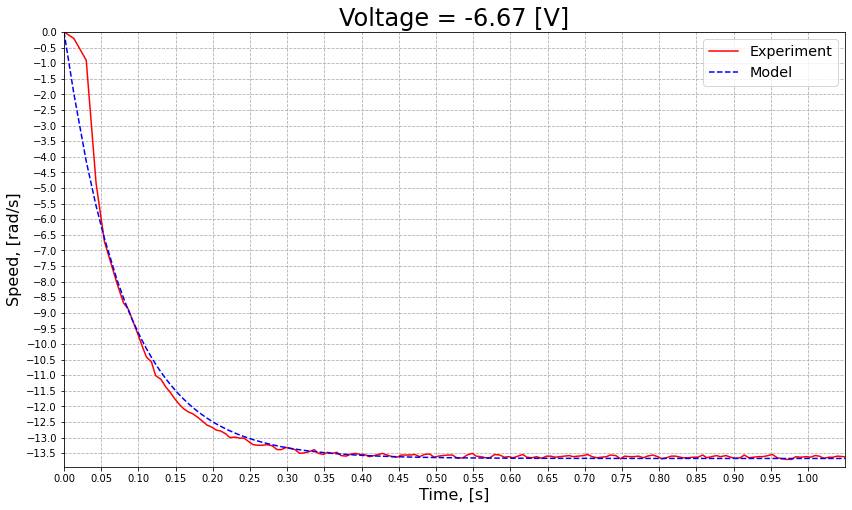

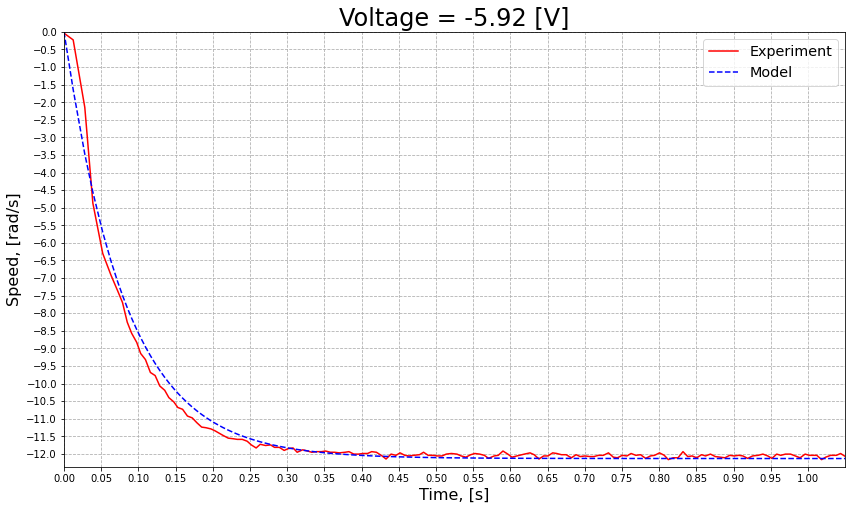

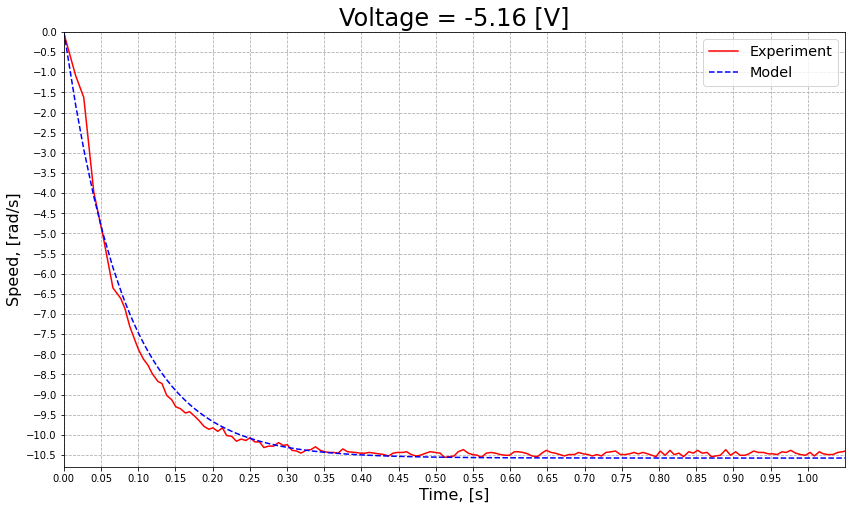

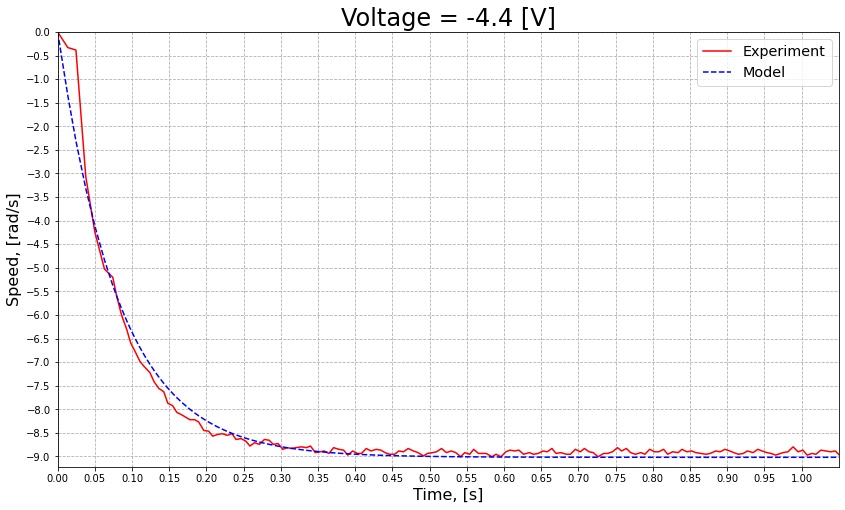

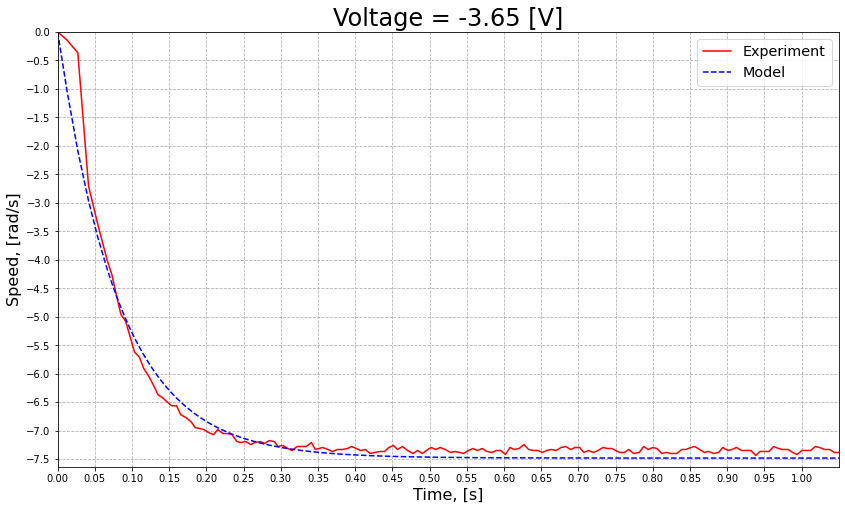

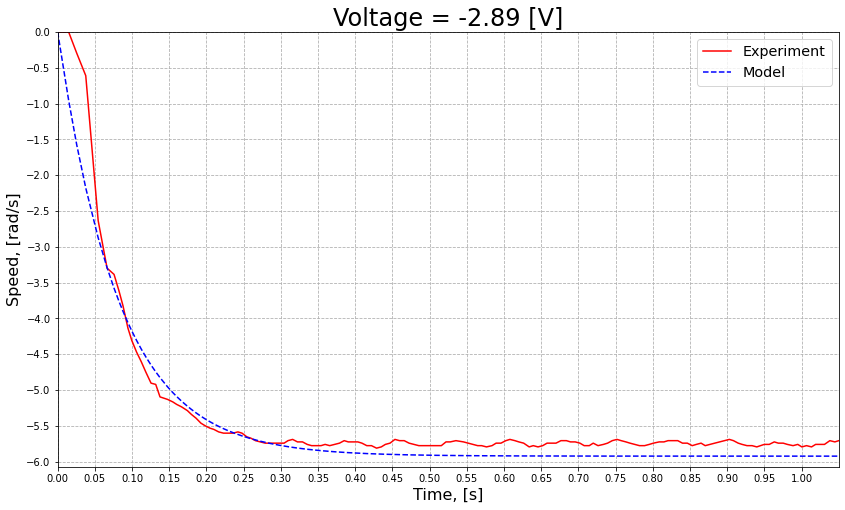

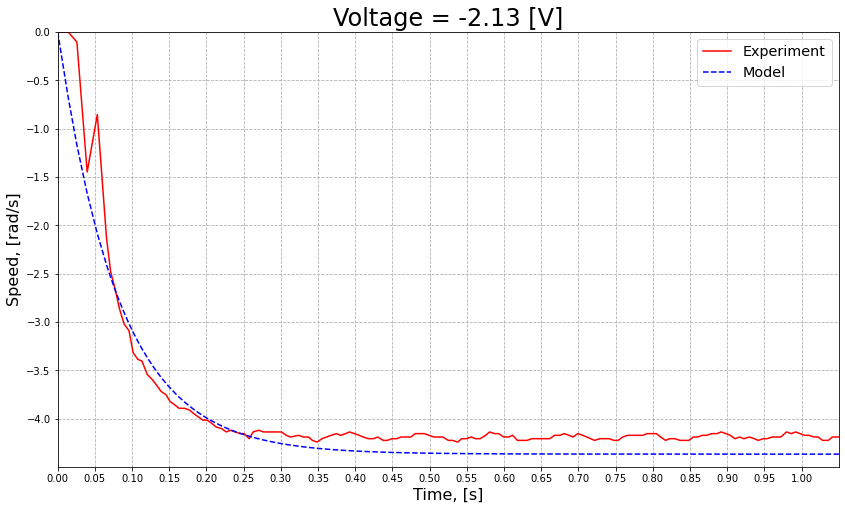

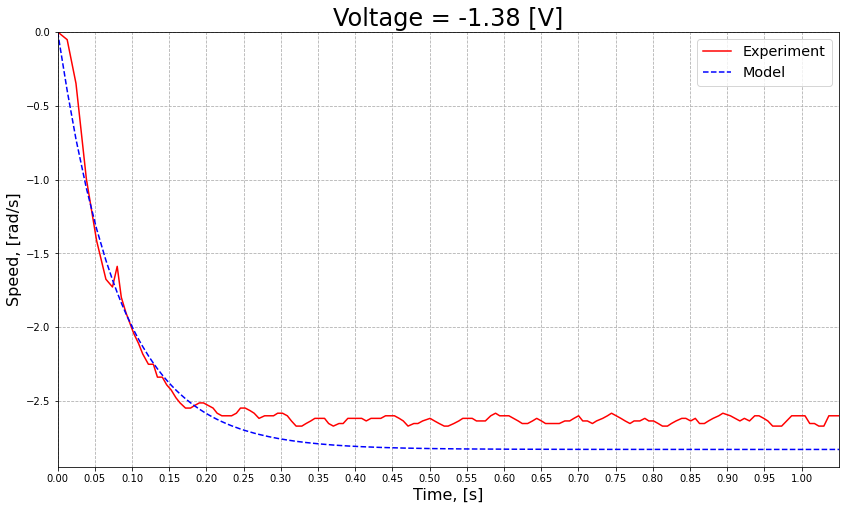

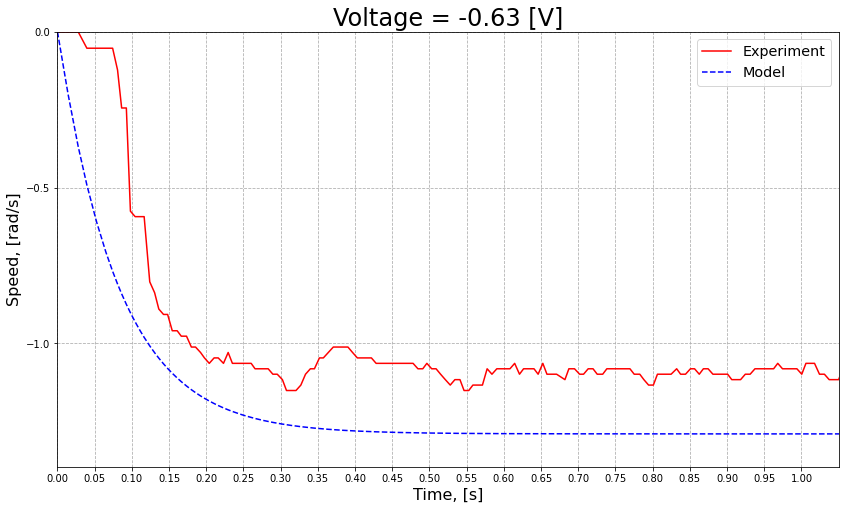

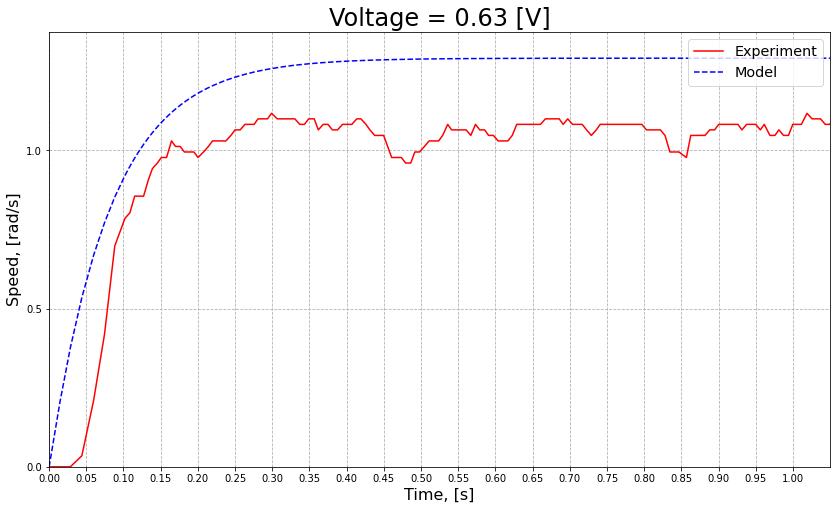

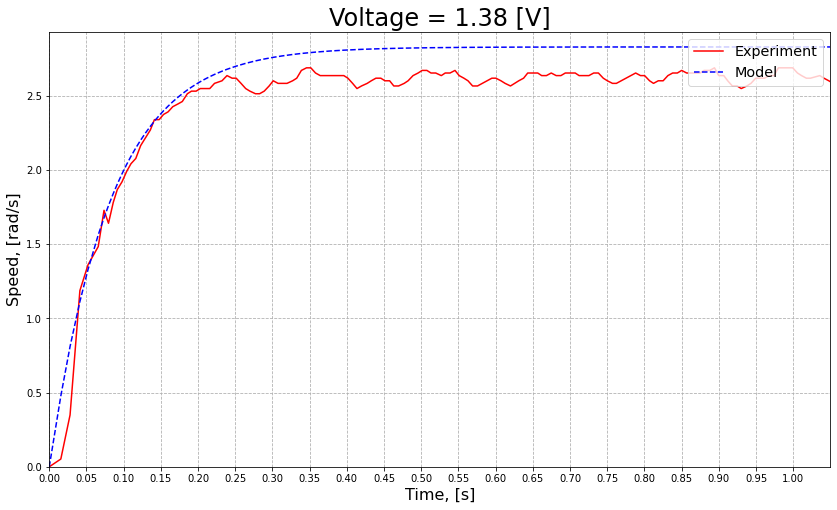

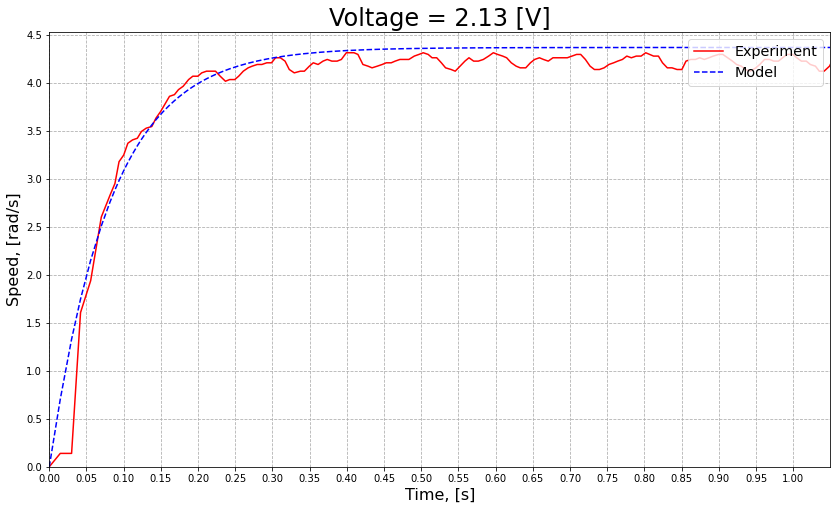

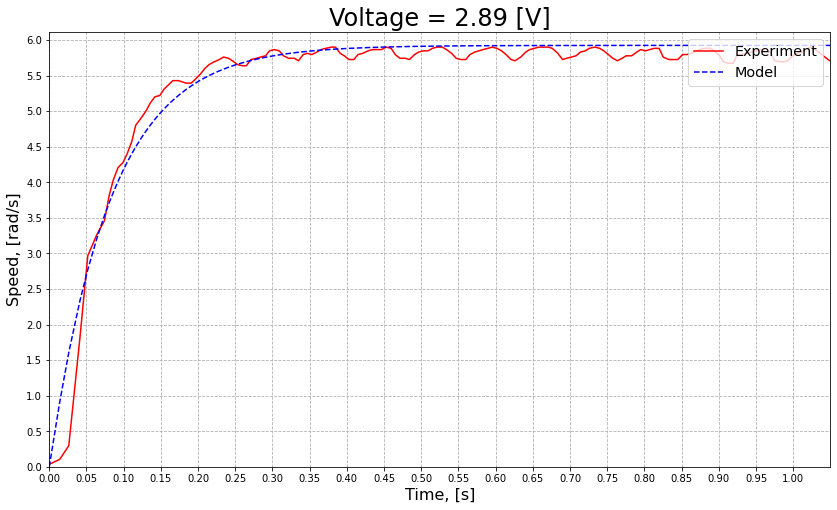

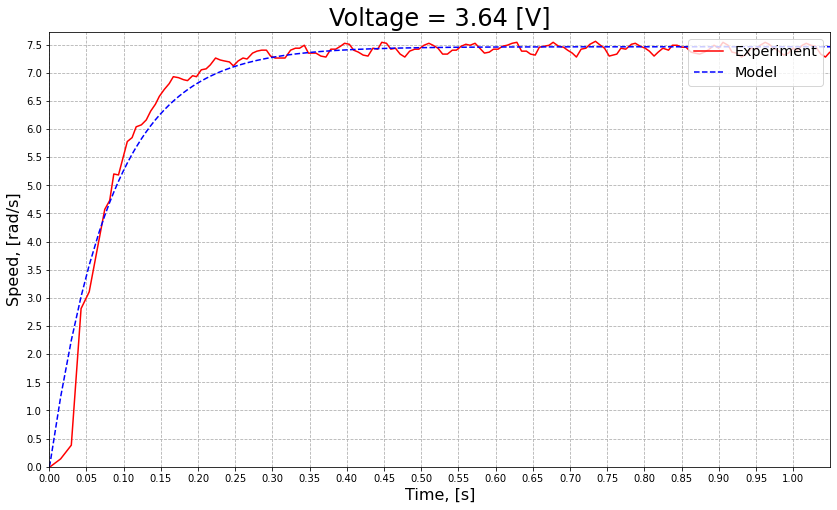

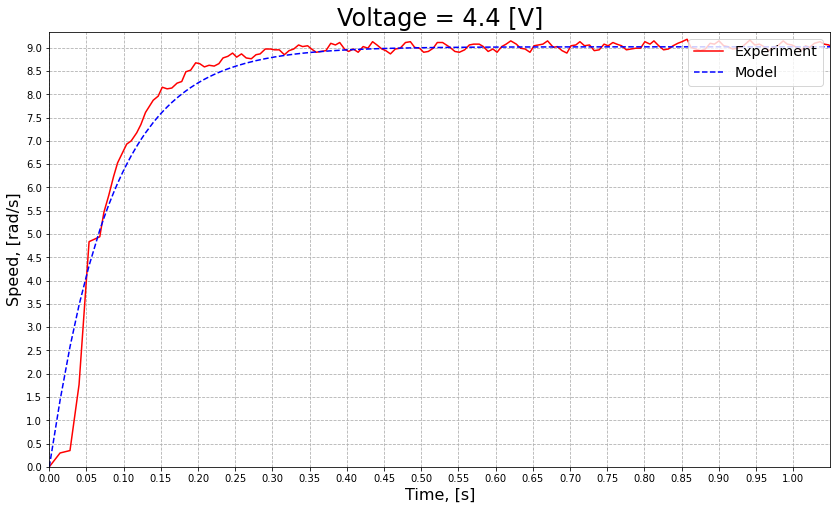

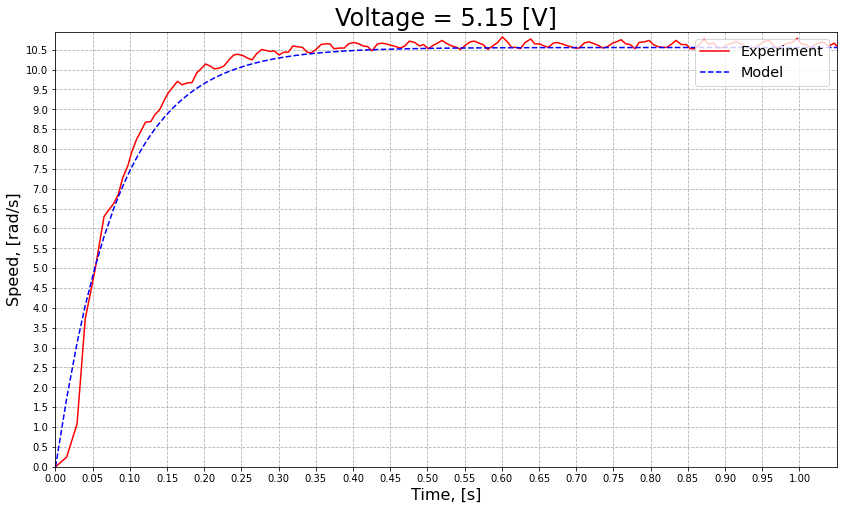

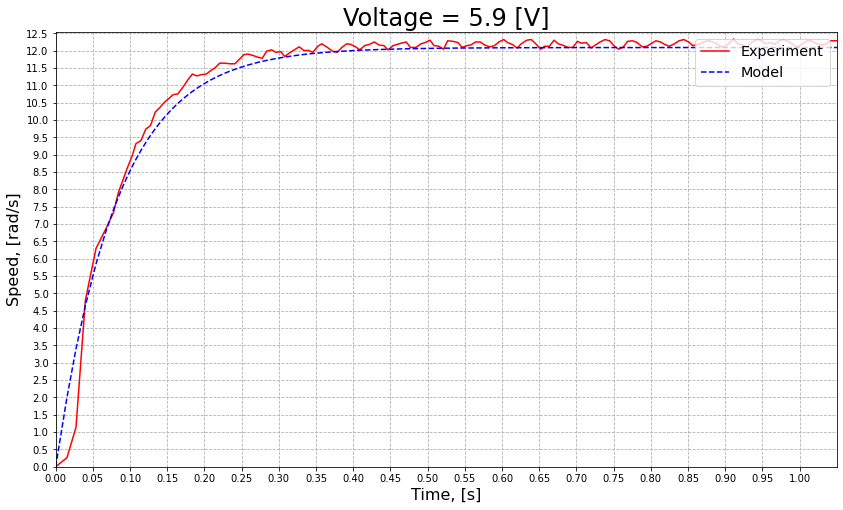

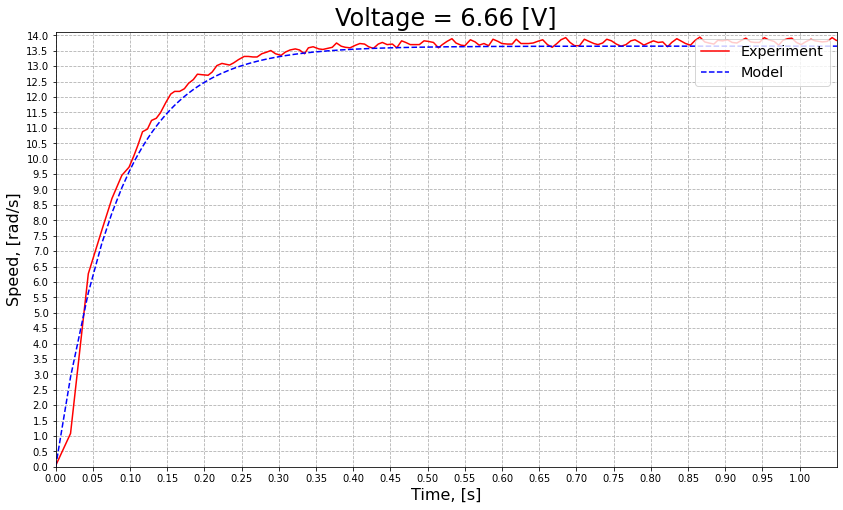

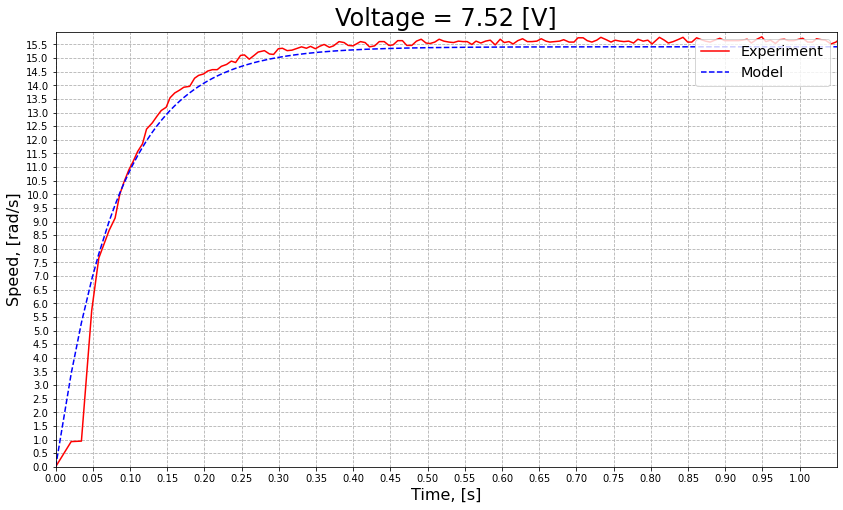

In [19]:
for i in range(20):
  omega_func = omega_f.subs({R: R_app, J: J_real, k_e: k_e_app, k_m: k_m_app, L: L_real, U: U_vals[i]})
  f, ax = plt.subplots(1, 1)
  f.set_size_inches((14, 8))
  ax.plot(time_all[i], speed_all[i], "r", linestyle="-", label="Experiment")
  omega_func_vals = []
  for time_1 in time_all[i]:
    omega_func_vals.append(omega_func.subs(t,time_1))
  ax.plot(time_all[i], omega_func_vals, "b", linestyle="--", label="Model")
  ax.set_xlabel("Time, [s]", size=16)
  ax.set_ylabel("Speed, [rad/s]", size=16)
  ax.set_title("Voltage = " + str(U_vals[i]) + " [V]", size=24)
  ax.set_xlim(0, 1.05)
  plt.xticks([x / 100 for x in range(0, 105, 5)])
  ax.grid(True, linestyle="--")
  plt.yticks([x/2 for x in range(-32,32)])
  if i < 10:
    ax.set_ylim(Wm_app[i]-0.3, 0)
  else:
    ax.set_ylim(0, Wm_app[i]+0.3)
  legend = ax.legend(loc='upper right', fontsize='x-large')
  legend.get_frame().set_facecolor('#FFFFFF')
  f.show()

Графики угла:

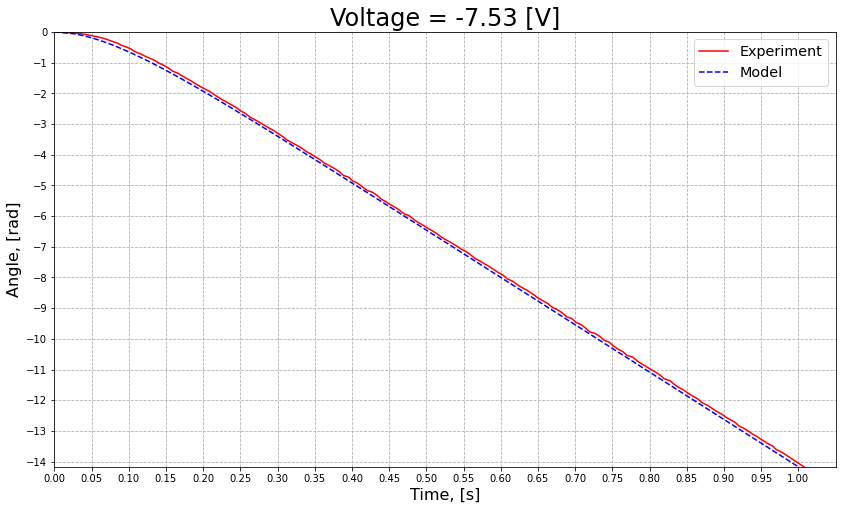

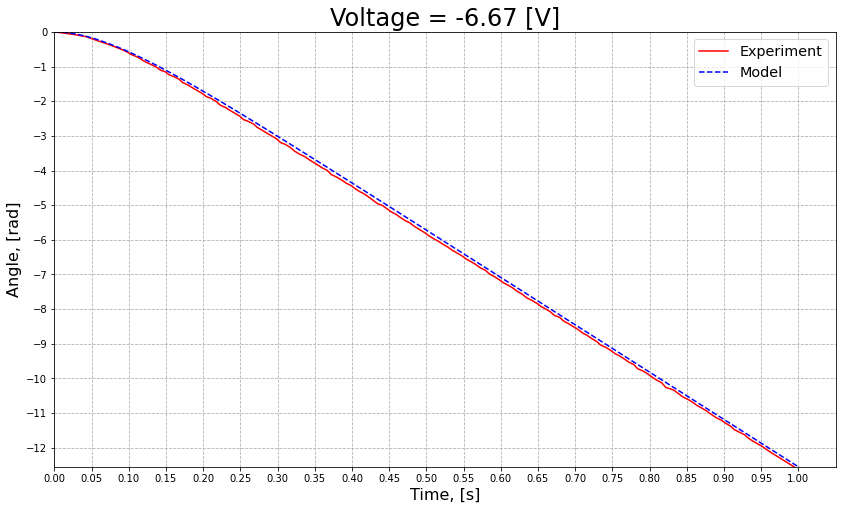

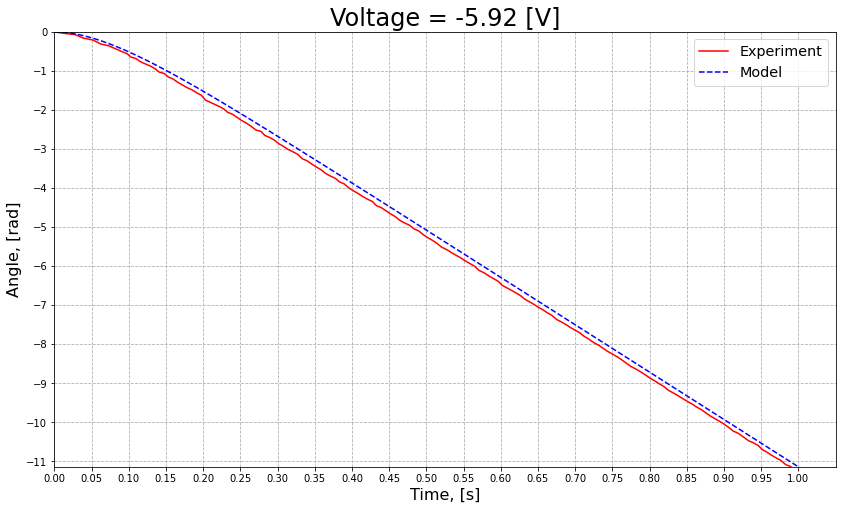

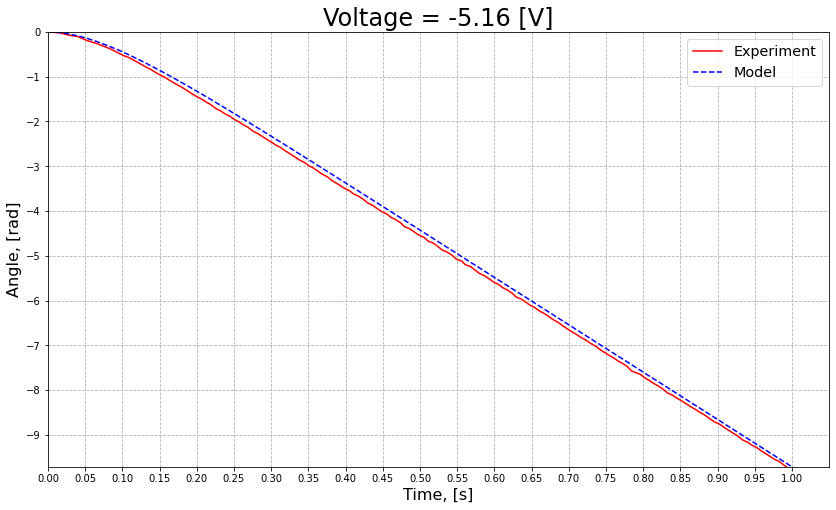

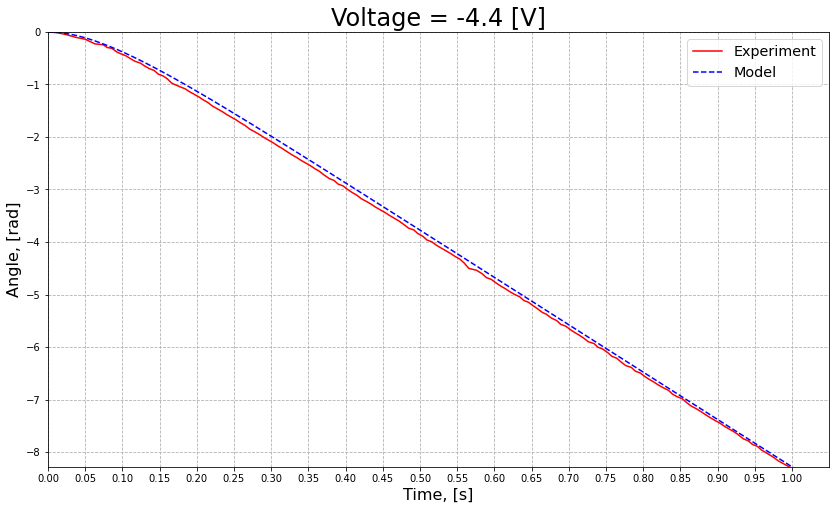

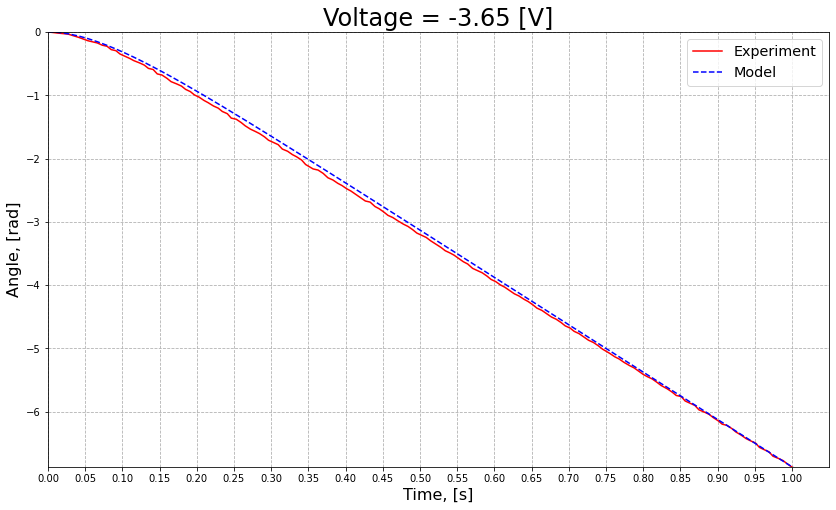

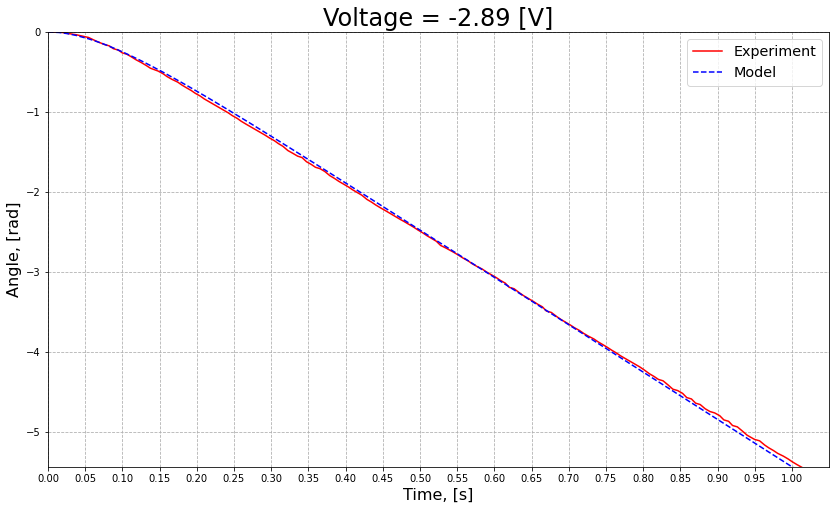

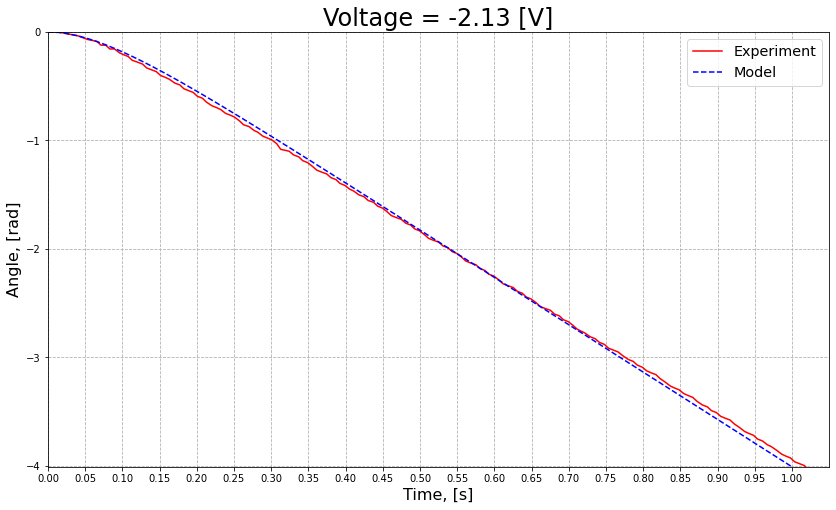

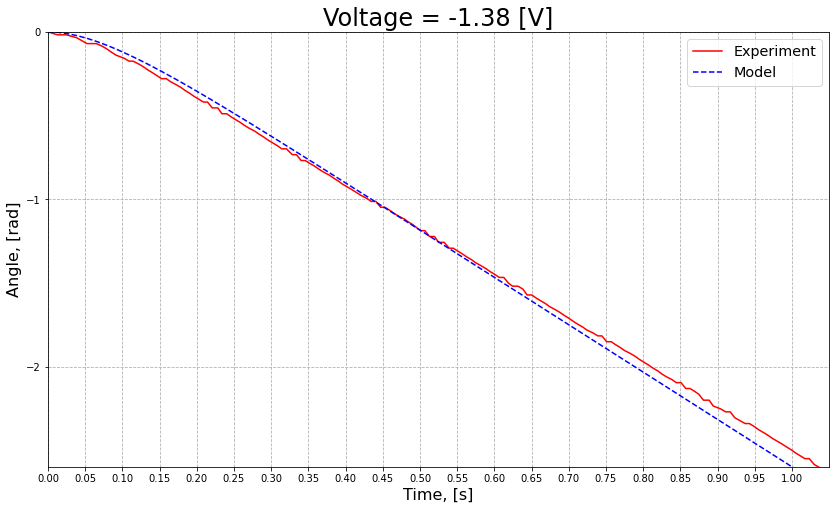

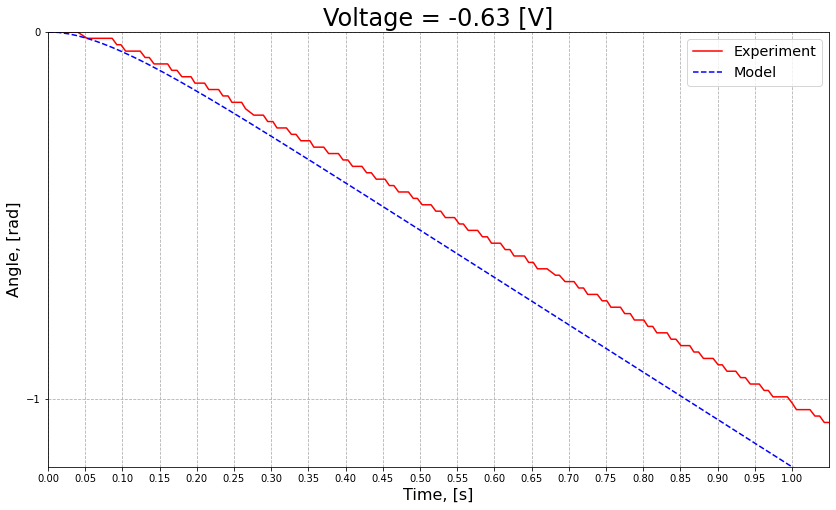

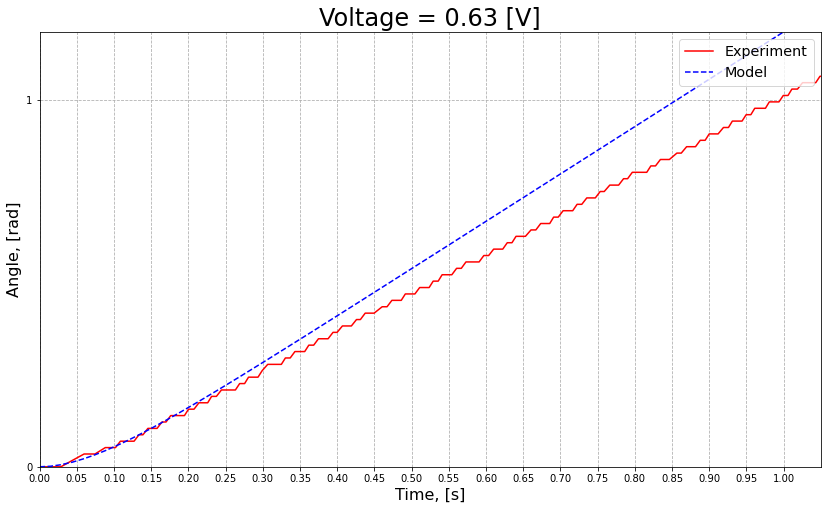

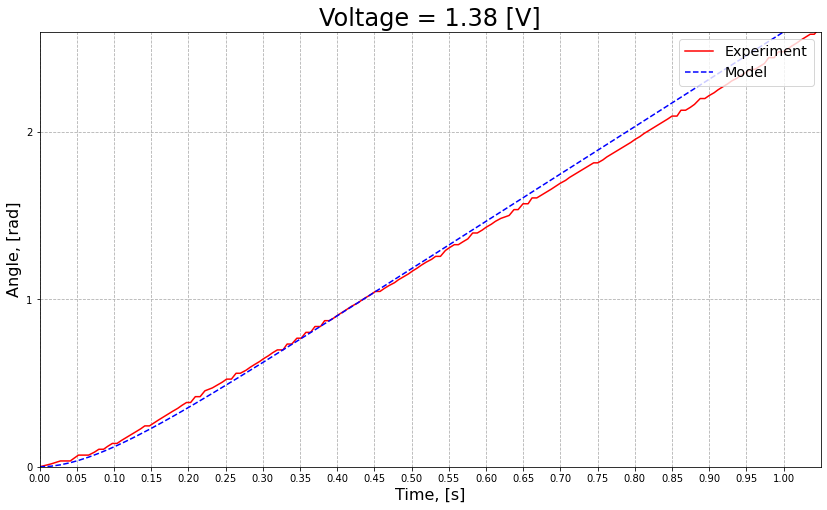

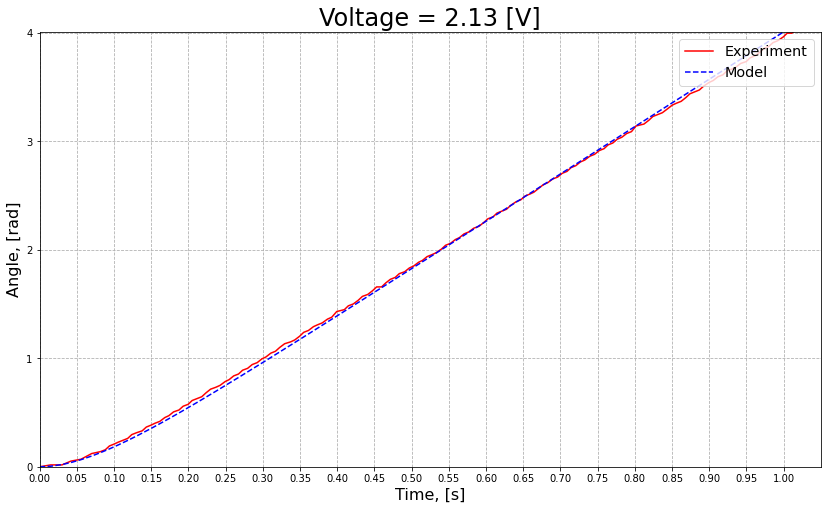

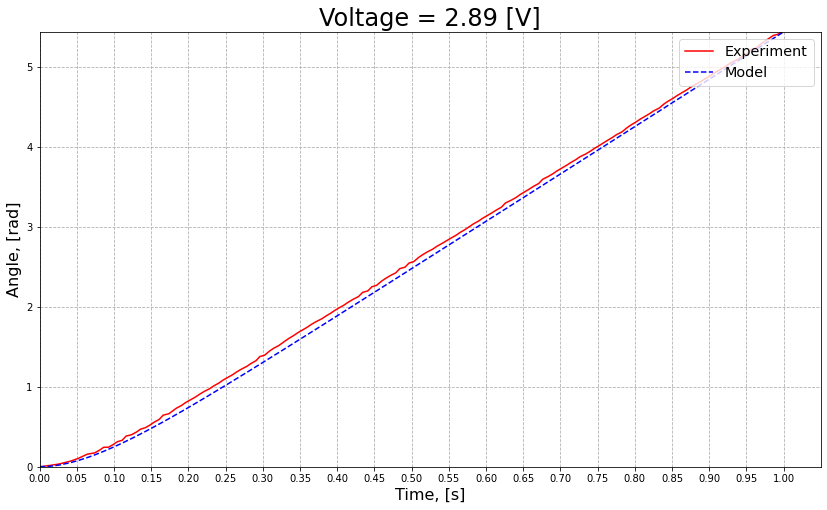

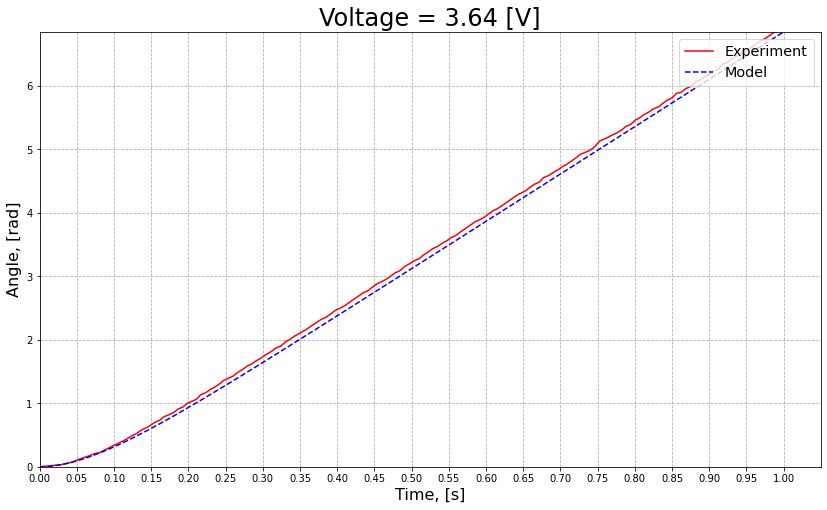

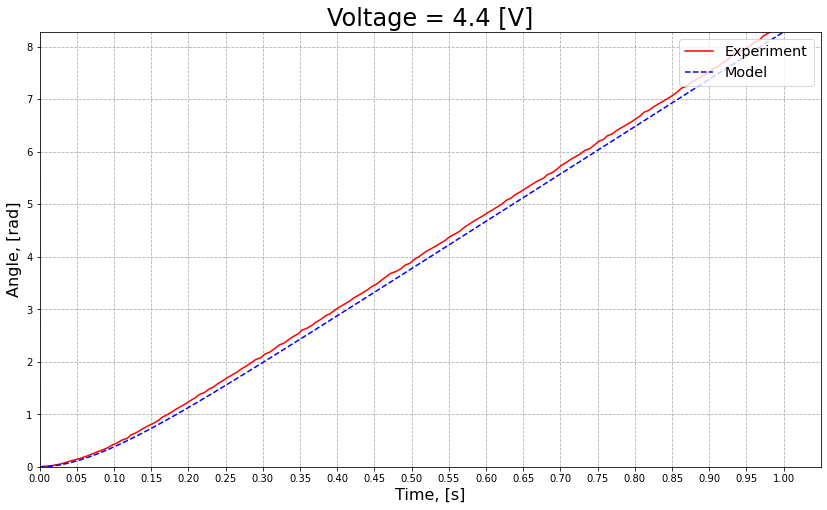

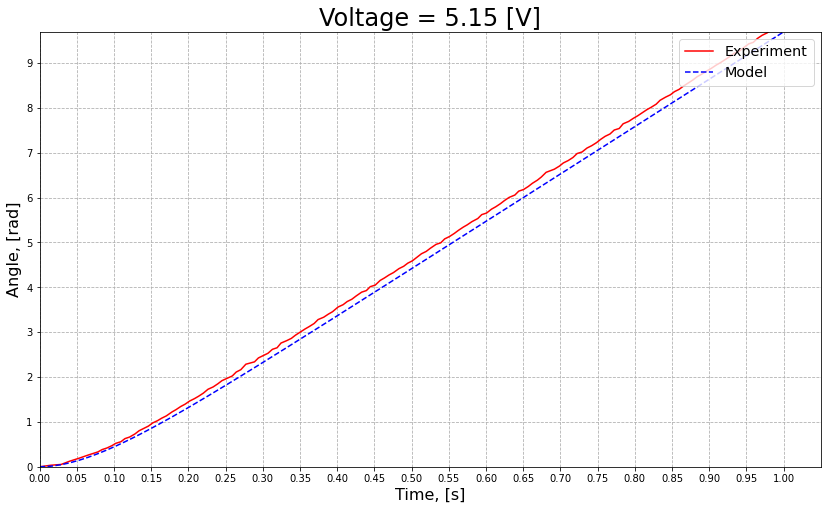

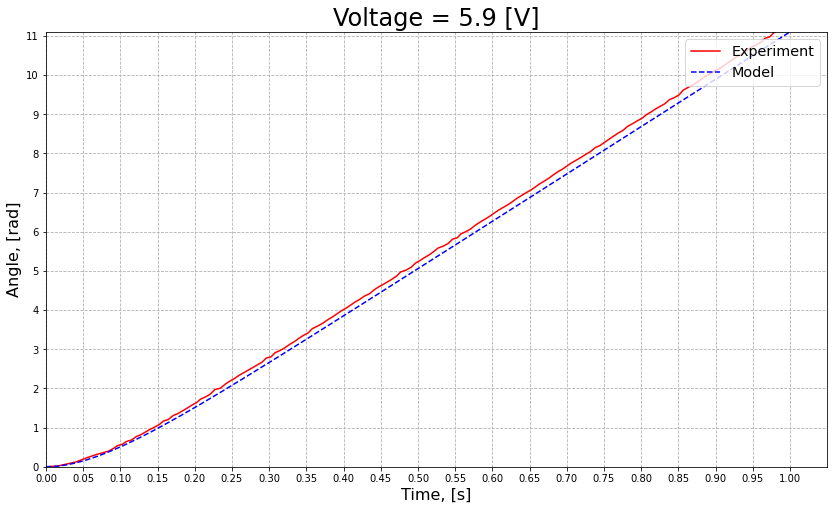

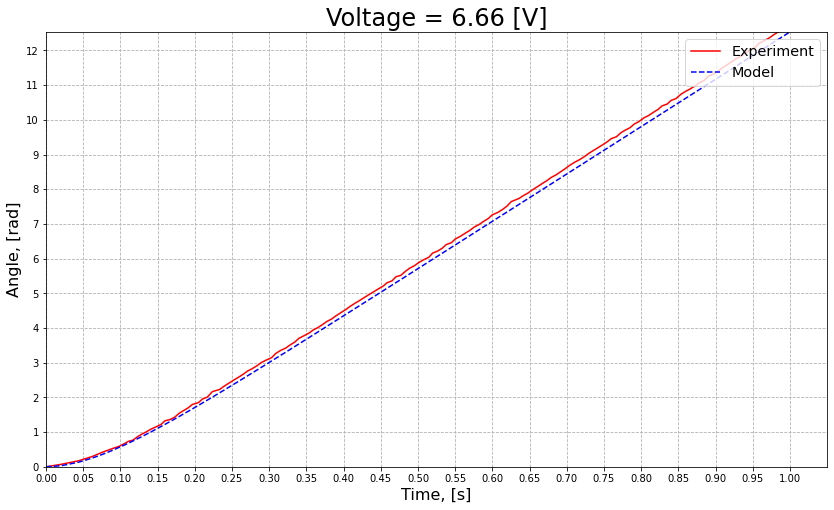

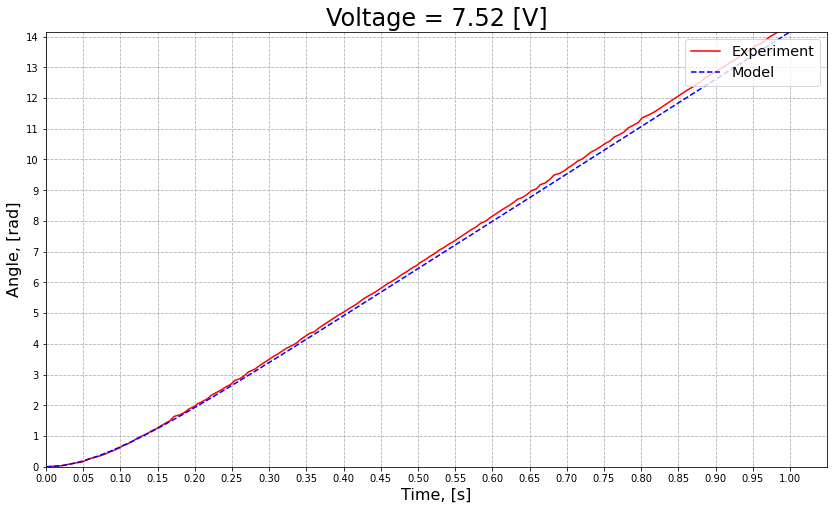

In [27]:
for i in range(20):
  theta_func = theta.subs({R: R_app, J: J_real, k_e: k_e_app, k_m: k_m_app, L: L_real, U: U_vals[i]})
  f, ax = plt.subplots(1, 1)
  f.set_size_inches((14, 8))
  ax.plot(time_all[i], angle_all[i], "r", linestyle="-", label="Experiment")
  theta_func_vals = []
  for time_1 in time_all[i]:
    theta_func_vals.append(theta_func.subs(t,time_1))
  ax.plot(time_all[i], theta_func_vals, "b", linestyle="--", label="Model")
  ax.set_xlabel("Time, [s]", size=16)
  ax.set_ylabel("Angle, [rad]", size=16)
  ax.set_title("Voltage = " + str(U_vals[i]) + " [V]", size=24)
  ax.set_xlim(0, 1.05)
  plt.xticks([x / 100 for x in range(0, 105, 5)])
  ax.grid(True, linestyle="--")
  plt.yticks([x for x in range(-14, 15)])
  if i < 10:
    ax.set_ylim(float(theta_func.subs(t,1)), 0)
  else:
    ax.set_ylim(0, float(theta_func.subs(t,1)))
  legend = ax.legend(loc='upper right', fontsize='x-large')
  legend.get_frame().set_facecolor('#FFFFFF')
  f.show()

Построим также графики тока от времени для каждого значения напряжения:

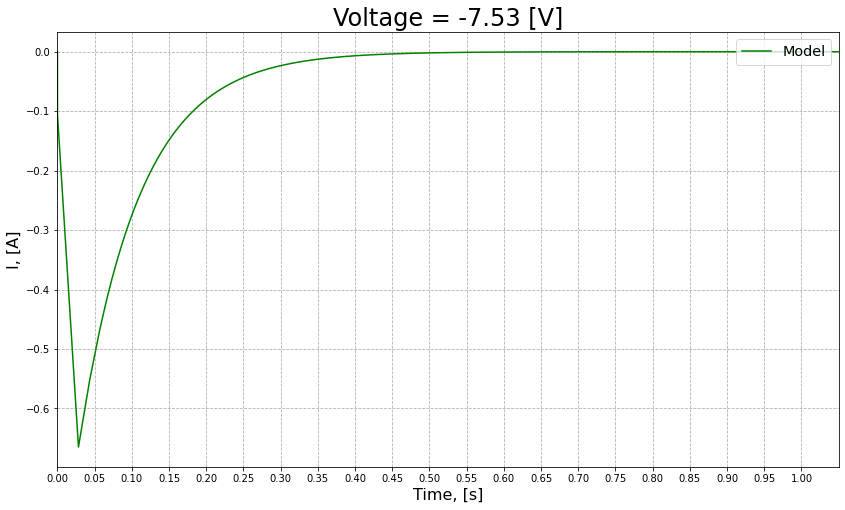

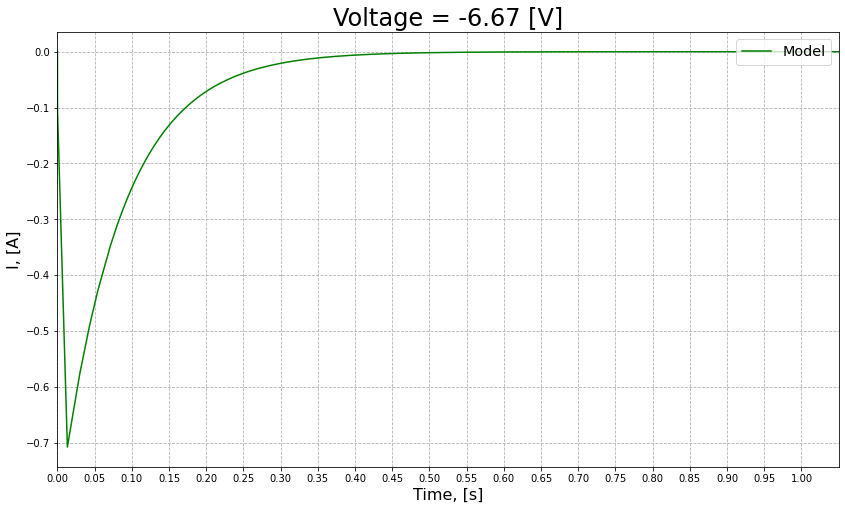

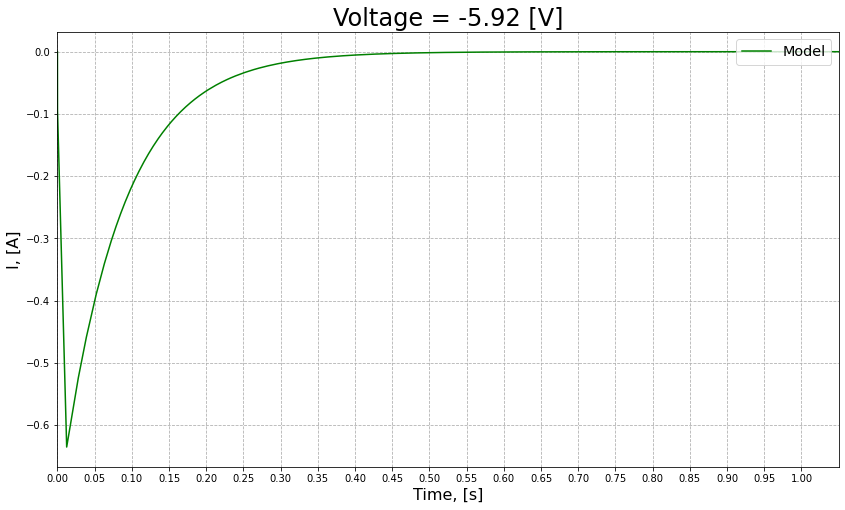

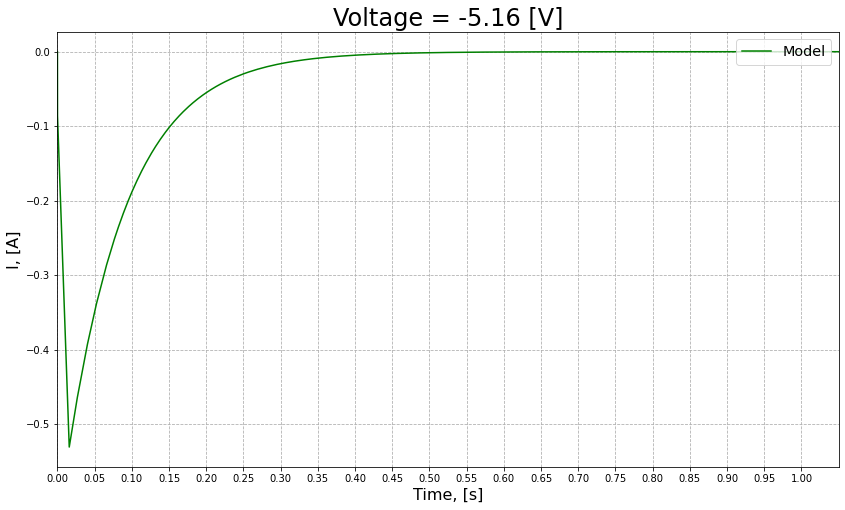

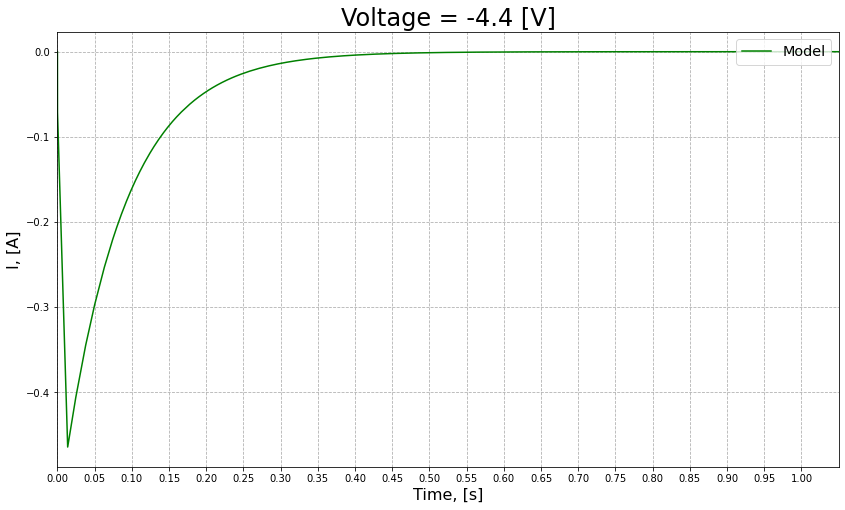

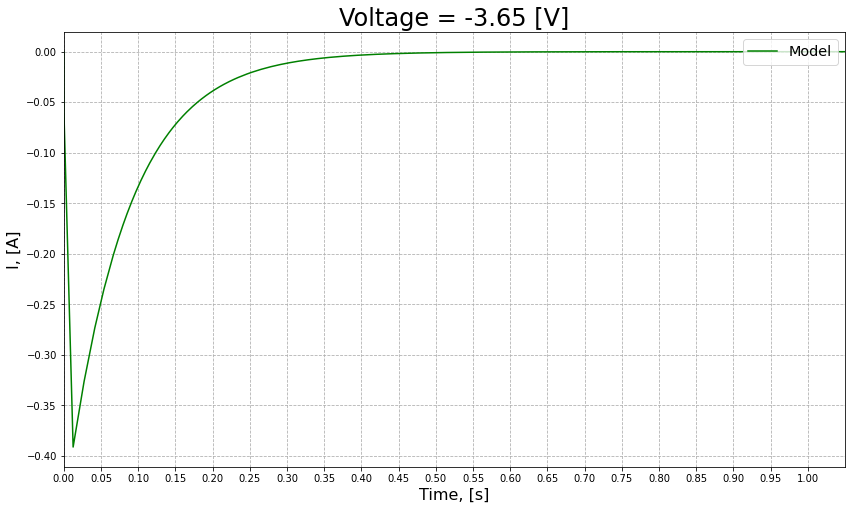

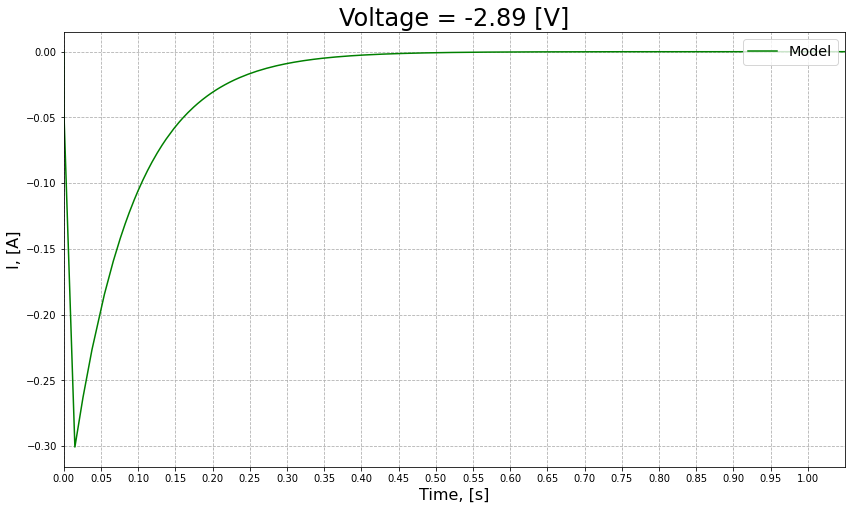

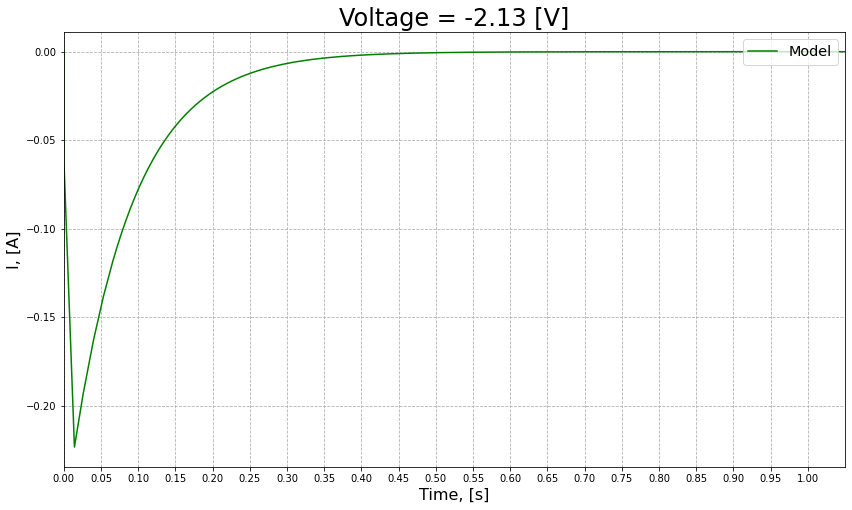

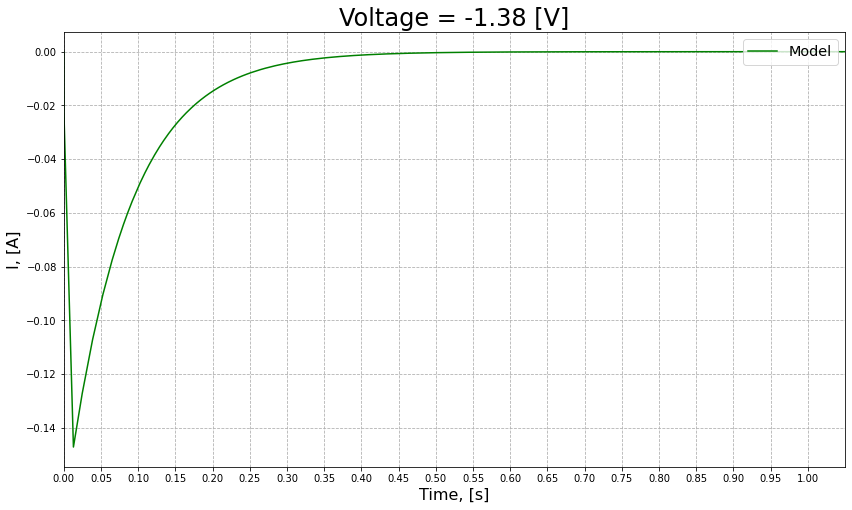

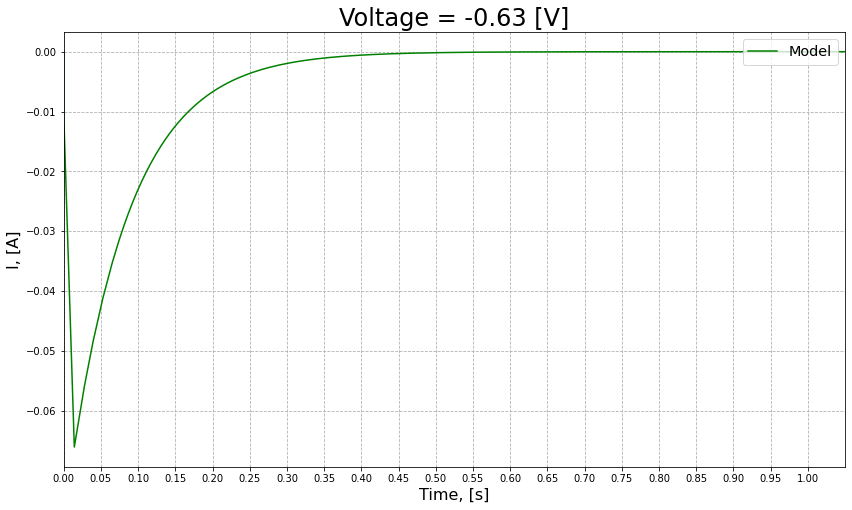

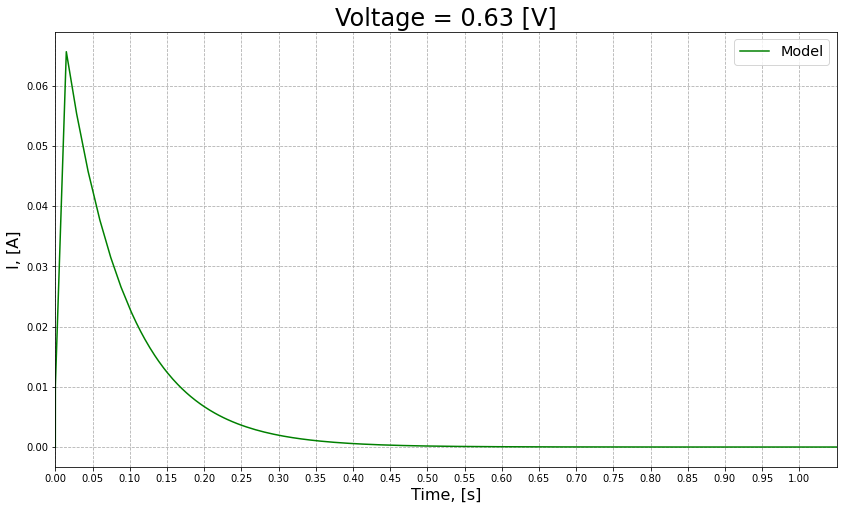

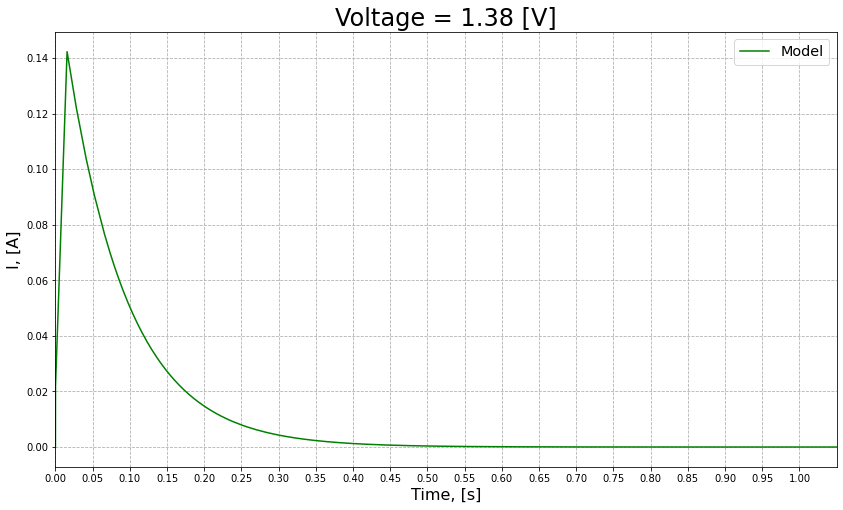

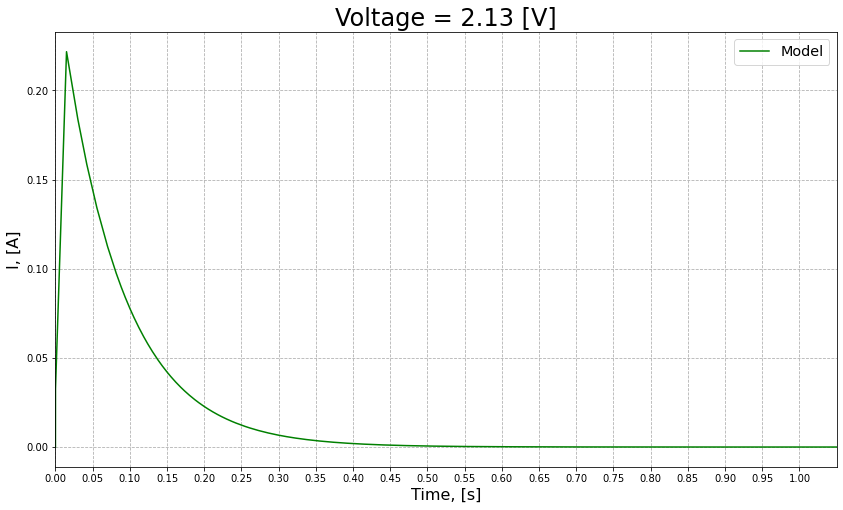

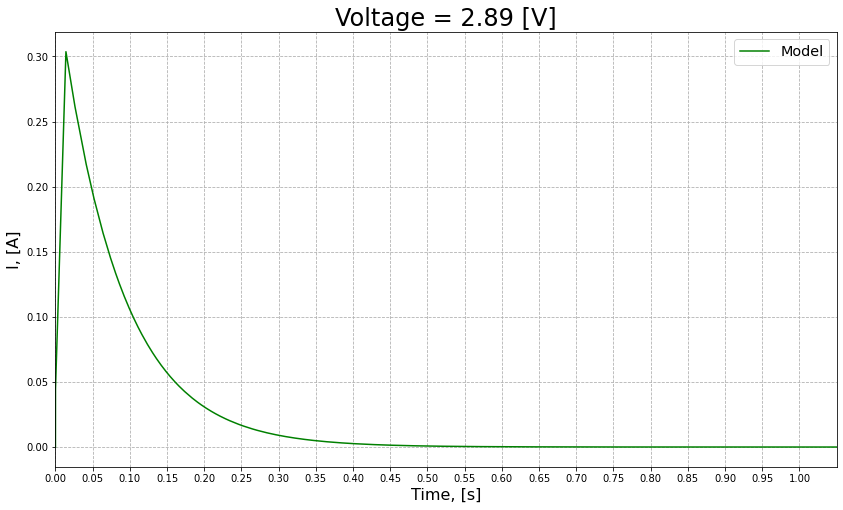

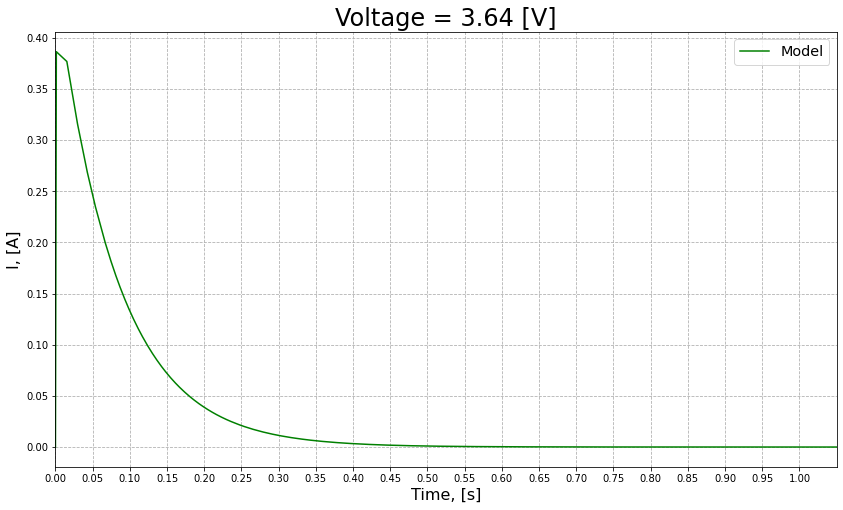

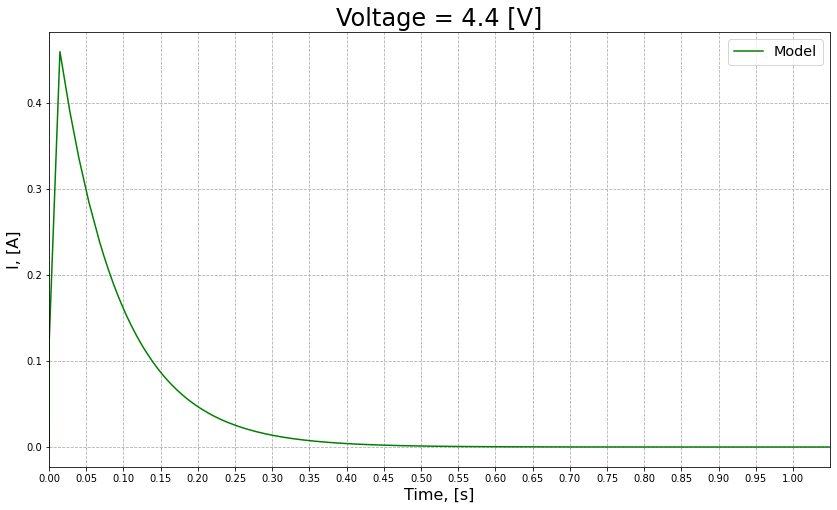

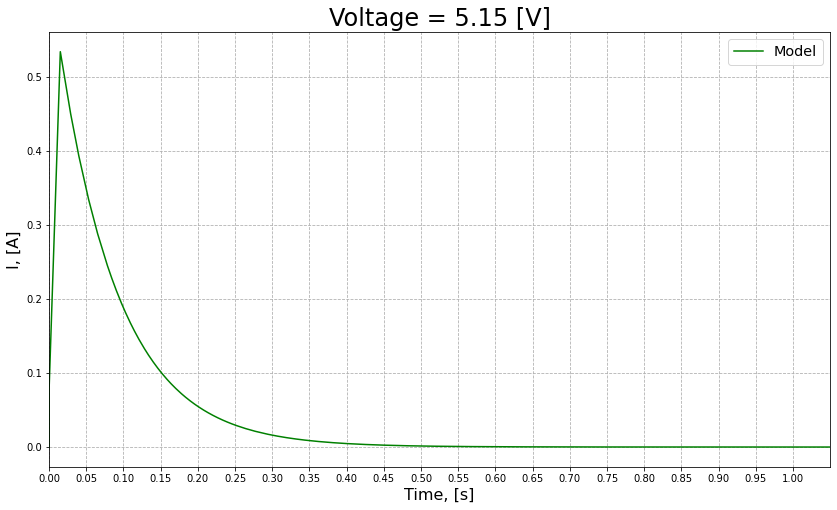

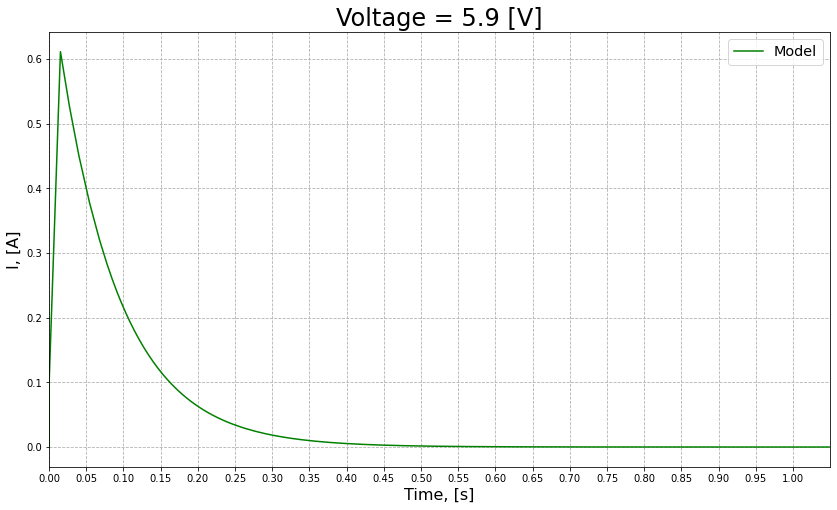

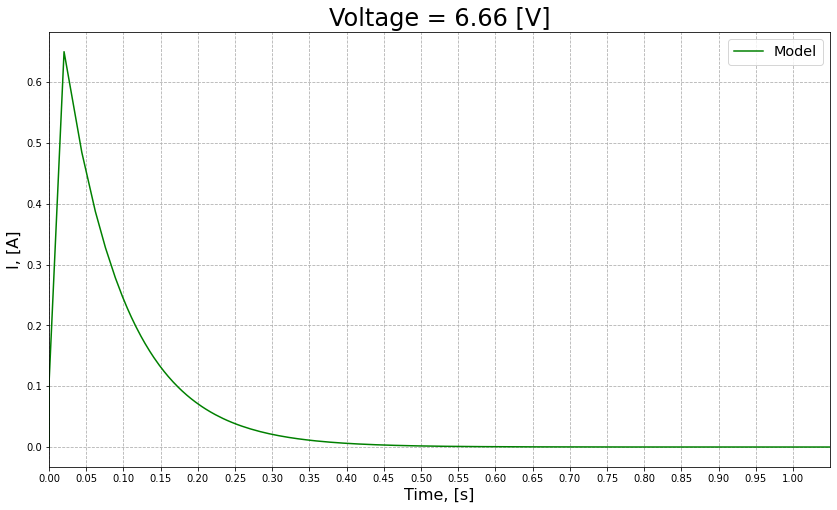

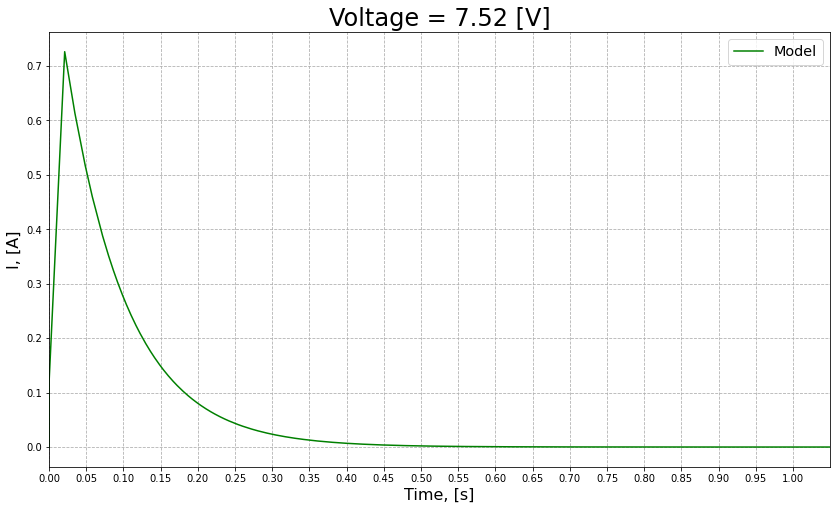

In [36]:
for i in range(20):
  I_func = I.subs({R: R_app, J: J_real, k_e: k_e_app, k_m: k_m_app, L: L_real, U: U_vals[i]})
  f, ax = plt.subplots(1, 1)
  f.set_size_inches((14, 8))
  I_func_vals = []
  for time_1 in time_all[i]:
    I_func_vals.append(I_func.subs(t,time_1))
  ax.plot(time_all[i], I_func_vals, "g", linestyle="-", label="Model")
  ax.set_xlabel("Time, [s]", size=16)
  ax.set_ylabel("I, [A]", size=16)
  ax.set_title("Voltage = " + str(U_vals[i]) + " [V]", size=24)
  ax.set_xlim(0, 1.05)
  plt.xticks([x / 100 for x in range(0, 105, 5)])
  ax.grid(True, linestyle="--")
  legend = ax.legend(loc='upper right', fontsize='x-large')
  legend.get_frame().set_facecolor('#FFFFFF')
  f.show()

Наблюдаем явление самоиндукции (график тока растет из 0).

Вычислив конструктивные постоянные, можем расчитать постоянные времени $T_m$ и $T_я$, характеризющие влияние ЭДС индукции и самоиндкции на протекающие процессы соответсвенно:

In [37]:
Tm_calc = J_real*R_app/(k_e_app*k_m_app)
Tr_calc = L_real/R_app
Tm_calc, Tr_calc

(0.08186586802961272, 0.0005911692771819824)

**Можно сделать вывод, что явление самоиндукции в намного меньшей мере влияет на процесс (порядок $T_m$ ниже чем у $T_я$). Этим и объясняется хорошая точность аппроксимации в первой лабораторной работе.**

Значения $T_m$, найденные при аппроксимации функции угла от времени упрощенной модели:

In [40]:
Tm_app

[0.08821667894666882,
 0.07335275403560927,
 0.06605825466974642,
 0.06688635588621755,
 0.06670050168817045,
 0.06329020142280996,
 0.06893187273162396,
 0.061586100364905215,
 0.05498767793971511,
 0.07862131271865533,
 0.05819439851144611,
 0.05577755999881757,
 0.06344883487041446,
 0.06033823449929411,
 0.06677827743999934,
 0.06723168002563774,
 0.06873413824515483,
 0.07339571099436237,
 0.07592776574298324,
 0.07953203390049451]

## Выводы
В первой лабораторной работе мы считали $T_m$ зависящей от напряжения. В следствие этого, в ходе аппроксимации мы получали различные  $T_m$, хорошо объясняющие зависимости угла и скорости от времени при определенных значениях напряжения. В данной лабораторной мы вычисляем  $T_m$ с помощью констант, полученных при аппроксимации функций $U(I)$ и  $\omega_{nls}(U)$.

На самом деле $k_e=k_m \neq const$, так как данные значения зависят от угла контура относительно вектора магнитной индукции. К тому же наше представление о двигателе как о контуре с током сильно упрощены. Это объясняет тот факт, что при некоторых значения напряжения расхождение экспериментальных данных с моделью достаточно велико.

Расчитав $T_m$ и $T_я$ делаем вывод о том, что L достаточно мала, что позволяет получать результы близкие к жкспериментальным при моделировании даже без учета самоиндукции.

Стоит заметить, чтозависимость U(I), которую мы аппроксимировали для нахождения $R$ не является линейной, что вносит погрешность в вычисления.